In [297]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [298]:
def cost(X,y,theta,alpha):
    
    X = np.c_[np.ones(len(X)), X]
    m = len(X)
    
    h = X.dot(theta)
    
    diff = h-y

    # sum((h-y)**2)
    J = diff.dot(diff) / (2 * m)
    gradient = (np.sum((h-y) * X.T,axis=1) / m) * alpha
    
    
    return J,gradient

In [299]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    J_History = []

    for i in range(iterations) :
    
        J,gradient = cost(X,y,theta,alpha)

        J_History.append(J)
    
        theta = theta-gradient
        
    return theta, J_History

In [300]:
def mean_normalization(X):
    
    """-1 <= xn <= 1  Features have approximately 0 mean"""
    
    X = np.array(X)
    
    # can also use max(X) - min(X) here instead of np.std
    range_X = np.std(X)
    avg_X =  np.mean(X)
    
    X = (X-avg_X) / range_X

    return X

In [301]:
def getlinear(m,b):
    
    """return a linear function with slope m and intercept b"""
    
    def f(x):
        return m*x + b

    return f


In [302]:
def getdata(f, xrange=30, erange=15):

    """Generate some linear data with x from 0-xrange with errors +- erange"""
    x=[i for i in range(xrange)]
    
    y = map(f,x)
    y = [z + random.uniform(-erange,erange) for z in y]
    
    return np.array(x), np.array(y)

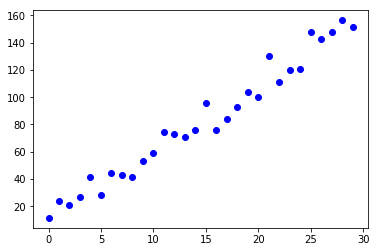

In [303]:
slope = 5
intercept = 10

X,y = getdata(getlinear(slope, intercept), xrange=30, erange=15)

plt.scatter(X,y,c='b')

linespace = np.linspace(min(X), max(X))
#plt.plot(linespace, slope*linespace + intercept, c='r')

plt.show()


In [304]:
alpha = .03  #learning rate
theta = np.array([1,1])
iterations = 5500

X_orig = X
X = mean_normalization(X)

theta, J_History = gradient_descent(X,y,theta,alpha,iterations)

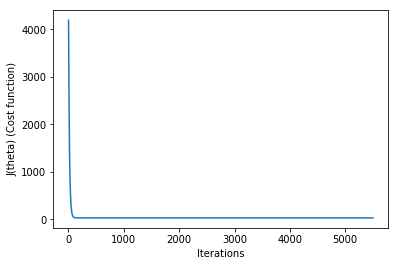

In [305]:
jspace = np.linspace(1,iterations,iterations)
plt.xlabel('Iterations')
plt.ylabel("J(theta) (Cost function)")
plt.plot(jspace, J_History)
plt.show()

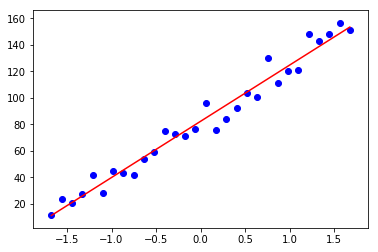

In [306]:
xspace = np.linspace(min(X), max(X))
plt.plot(xspace, theta[1] * xspace + theta[0], c='r')

plt.scatter(X,y,c='b')
plt.show()

In [307]:
xx = np.matrix(np.c_[np.ones(len(X)),X])
A = (xx.T * xx).I

closed = A * xx.T * np.matrix(y).T
print ("Closed soln: ", closed.T)
print ("Gradient Descent: " , theta)
print ("Difference: " , closed.T-theta)



Closed soln:  [[82.2987866  42.41523378]]
Gradient Descent:  [82.2987866  42.41523378]
Difference:  [[2.4158453e-13 1.0658141e-13]]


In [308]:
slope = theta[1] / np.std(X_orig)
print ("Slope: ", slope)
intercept = theta[0] - (theta[1] * (np.mean(X_orig)/np.std(X_orig)))
print ("Intercept: ", intercept)

Slope:  4.90041253670307
Intercept:  11.242804814674969


In [309]:
xx = np.matrix(np.c_[np.ones(len(X_orig)),X_orig])
A = (xx.T * xx).I
closed = A * xx.T * np.matrix(y).T
newtheta = np.matrix([intercept,slope])
print("Closed (orig): ", closed.T)
print("New theta: ", newtheta)
print ("Difference: ", closed.T-newtheta)

Closed (orig):  [[11.24280481  4.90041254]]
New theta:  [[11.24280481  4.90041254]]
Difference:  [[6.92779167e-14 1.33226763e-14]]


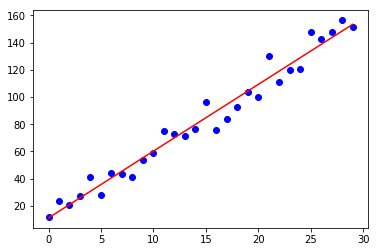

In [310]:
plt.scatter(X_orig,y,c='b')

linespace = np.linspace(min(X_orig), max(X_orig))
plt.plot(linespace, slope*linespace + intercept, c='r')
plt.show()